In [156]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

In [144]:
iris = load_iris()
x = iris.data

In [313]:
def kmeans(k,x):
    lst = []
    dists = 0
    d = 0
    for i in xrange(k):
        lst.append(x[np.random.randint(len(x)),:])
    arr = np.array(lst)
    d = cdist( arr, x )
    dists = np.argmin(d,axis=0)
    for i in xrange(1000):
        ind_lst = []
        for i in xrange(k):
            ind_lst.append(np.where(dists==i))
        lst = []
        for i in ind_lst:
            lst.append(np.mean(x[i],axis=0))
        arr = np.array(lst)
        d = cdist( arr, x )
        dists = np.argmin(d,axis=0)
    return np.sum(np.min(d,axis=0)),dists

In [314]:
error_lst = []
for i in xrange(2,13):
    error_lst.append(kmeans(i,x)[0])

In [315]:
error_lst

[128.40419523672944,
 97.346219694156815,
 84.748834477518244,
 88.37238574060143,
 74.061461825325125,
 66.321902386035632,
 66.593461332136698,
 62.690279966020839,
 66.723150954540756,
 60.704247800785687,
 61.453082156444772]

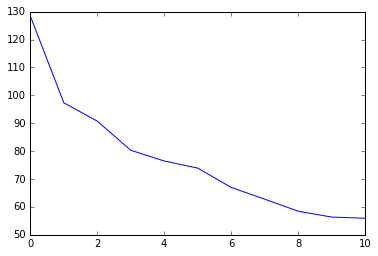

In [304]:
plt.plot(error_lst)

In [325]:
sil_lst = []
for i in xrange(2,11):
    sil_lst.append(kmeans(i,x)[1])
#     sil_lst.append(silhouette_score(x,kmeans(i,x)[1]))

In [326]:
sil_scores = []
for i in sil_lst:
    print 1-silhouette_score(x,i,metric='euclidean')

0.319186379729
0.447408055479
0.504880004503
0.507144408202
0.588185891344
0.66763154539
0.737263920601
0.678989621087
0.669605931382


In [219]:
sil_lst[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
fin_lst = []
for i in xrange(10):
    fin_lst.append(np.where(dists==i))

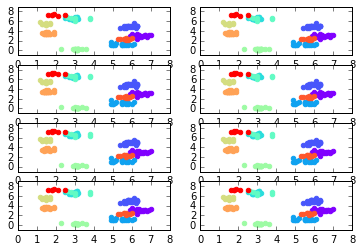

In [85]:
fig, ax = plt.subplots(nrows=4,ncols=2)
inds = [(i,j) for i in range(4) for j in range(4) if i!=j]
for row in ax:
    for col in row:
        for i in xrange(10):
            col.scatter(x[fin_lst[i]][:,inds[i][0]]\
           ,x[fin_lst[i]][:,inds[i][1]],color=colors[i])